# 🎵 Data-driven Personal Music Activity Analysis 🎶
<img src="https://i.imgur.com/HhlkLb0.jpg" width="580"/>



 ## 📑 Table of Contents 📑
 
[🧾 Imports 🧾](#imports)

[🧹 Data Cleaning 🧹](#cleaning)

>RYM

>LastFM

[✍ Data Preperation ✍](#prep)

>[RYM]

>LastFM

>Both

[📊 Data Analysis/Visualization 📈](#visual)

>RYM

>>Overall Rating Chart

>>Rating Trend every Decade

>>Albums Count based on Release Date

>>Album Rating Based on Release Date

>LastFM

>>Top Artists

>>>Progression over the Years

>>Top Albums

>>Scrobble Count

>>>Day of the Week Scrobble Count

>>>Yearly Scrobble Count

>>>Monthly Scrobble Count

>>>Yearly vs Favourite Year

>>>Monthly vs Favourite Month

>>🕒 Listening Clock 🕒

>>>Totally for a day

>>>Yearly for a day

>>>Weekly for a day

>>Text Analysis

>>>Artist count based alphabetically

>>>Common Words in Artist Names

>>>Longest Artist Name

>>>Histogram of Artist Name Length

[🔎 Data Modelling 🔎](#model)

>Model Comparison (Supervised)

>>Simple Model Comparison

>>>Algorithms Compared

>>Models with KFold Cross-Validation Comparison

>>>Algorithms Compared

>🎨 K-Means Clustering for Recent Favourites 🎨

>>Choosing Optimal K-value

>>Clusters Explained

>>🕵️‍♀️ Cluster Speculations and Comparisons 🕵️‍♀️

[🔚 Conclusion 🔚](#conclude)


## Introduction 
The project explores personal music activity, using [Last.fm](https://www.last.fm/), a website that builds a detailed profile of each user's musical taste by recording details of the tracks heard by the user and [RateYourMusic](https://www.rateyourmusic.com/) a collaborative music database used to catalog and rate music (and films). The former however has a 'Report' section that does statistically create reports for past week and year but is quite limited. We use the liberty of having the overall archival data of both the websites to have the ability to visualize overall, yearly, monthly, weekly or even daily stats for artists, their albums, ratings per album or even play counts and various other combinations.

### Goal
The intention of this project is to understand underlying possibilities of music listening behaviour having personally realised erratic taste in music, e.g. albums with the highest rating don't necessarly have high play count. Being able to create an overall summary of complete music activity from both sources together visually and statistically.

#### Problem Statements

*   Can the user's behavioral patterns be seen is the music data?
*   Does the user's unbiased, subjective view on his taste in music (being quite vast and sporadic) subconsciously still have a certain pattern?



## Dataset

We're looking at two sources from Reuben's profile, taken from [LastFM](https://www.last.fm/user/reuben_francis) and [RateYourMusic](https://rateyourmusic.com/~reubenfrancis). 

### LastFM

LastFM keeps tracks of the tracks that have been listened to and logs them. It has an open-source free API that helps extract necessary data from the website, the exports however are in [REST](http://en.wikipedia.org/wiki/Representational_State_Transfer)-style XML. A little block of code can help extract XML data by looping through each page and finally converting it to '.csv' format.

### RYM

RateYourMusic helps rate albums you've heard and also create a 'wishlist' of albums to be heard. The profile, once authenticated have a direct link to export data in the main website. This however is just a '.txt' file that needs to be preprocessed and converted to '.csv'. 


<a name='imports'></a>
## 🧾 Imports 🧾

All necessary imports, funtions and global variables are present here

In [ ]:
%cd ./group-project-group-c/

In [ ]:
import pandas as pd, numpy as np, string, re
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import r2_score, mean_squared_error, precision_score,confusion_matrix, accuracy_score,classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
!pip install scikit-plot
import scikitplot as skplt

import matplotlib.pyplot as plt,  matplotlib.font_manager as fm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [ ]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    import matplotlib.cm as cm, numpy as np
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors




---



<a name='cleaning'></a>
## 🧹 Data Cleaning 🧹

Here, we read our csv files and clean up the data taken from LastFM and RateYourMusic. Two profiles which are most actively used and monitored.

###RYM

Profile: https://rateyourmusic.com/~reubenfrancis

RateYourMusic helps rate albums you've heard and also create a 'wishlist' of albums to be heard. The profle allows the user to export their data in a comma-seperated text file which can be quickly converted to an xlsx file using Excel. We import this raw file.

In [ ]:
rym = pd.read_excel("data/rym.xlsx", sheet_name="Sheet1")

Remove white spaces in column names while compacting them

In [ ]:
rym.columns = rym.columns.str.strip()
rym['Artist'] = rym['First Name'].fillna('') + ' ' + rym['Last Name'].fillna('')
rym['Name localized'] = rym['First Name localized'].fillna('') + ' ' + rym['Last Name localized'].fillna('')

In [ ]:
rym.loc[rym['Name localized']!=" ",'Artist'] = rym.loc[rym['Name localized']!=" ",'Name localized']

Remove unwanted columns and rearrange

In [ ]:
rym.drop(['First Name localized','Last Name localized','RYM Album','Name localized','First Name','Last Name'],axis=1, inplace=True)
rym = rym[['Artist','Title','Release_Date','Rating','Ownership']]

Rename column names while stripping column values as needed

In [ ]:
rym.loc[:,'Artist'] = rym.Artist.str.replace('&amp;','&')
rym.loc[:,'Title'] = rym.Title.str.replace('&amp;','&')
rym.rename(columns = {'Title':'album'}, inplace = True)
for i in ['Artist','album']:
    rym[i] = rym[i].map(lambda x: x.strip())

In [ ]:
rym.sort_values(['Artist'],ascending=True,inplace=True)
rym.sample(10)

,Artist,album,Release_Date,Rating,Ownership
969,Klaus Schulze,&#34;X&#34;,1978,0,w
1774,Pile,Dripping,2012,0,w
4148,Flying Lotus,Until the Quiet Comes,2012,7,n
2536,Camera Obscura,Let's Get Out of This Country,2006,7,n
1627,Damo Suzuki & black midi,Damo Suzuki Live at the Windmill Brixton With ...,2018,0,w
4719,Resplandor,Elipse,2000,0,w
3208,Dis Fig,Purge,2019,6,n
5109,The Weeknd,After Hours,2020,8,n
5239,Sheena Ringo,加爾基 精液 栗ノ花 (Kalk samen kuri no hana),2003,0,w
4577,Oranssi Pazuzu,Värähtelijä,2016,0,w


In [ ]:
rym.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 4451
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        5268 non-null   object
 1   album         5268 non-null   object
 2   Release_Date  5268 non-null   int64 
 3   Rating        5268 non-null   int64 
 4   Ownership     5268 non-null   object
dtypes: int64(2), object(3)
memory usage: 246.9+ KB


After required cleaning, the columns are reduced to the following:
```
{artist, album, release_date, rating, ownership}
```
Each column should be self explainatory, the ownership column has two values `n` and `w`. The latter shows that the album has been rated while former notes that the user has added it to their wishlist to listen and rate later. 

There are around 5k rows, mix of rated and wishlisted albums.




---



### LastFM

Profile: https://www.last.fm/user/reuben_francis

LastFM keeps tracks of the tracks that have been listened to and logs them. It has an open-source free API that helps extract necessary data from the website, the exports however are in REST-style XML. A little block of code can help extract XML data by looping through each page and finally converting it to '.csv' format. 

LastFM data has been extracted using the lastfm_to_csv.ipynb file. 

In [ ]:
lastfm = pd.read_csv("data/lastfm_scrobbles.csv")

Change index to timedate 

In [ ]:
lastfm.index = pd.to_datetime(lastfm['datetime'])
lastfm.drop(['timestamp','datetime'], axis=1, inplace=True)

Column renaming and index sorting

Scrobbles is a term used to describe track play, "I have 50k scrobbles" explains how he's heard 50k tracks that are logged in his profile.

In [ ]:
lastfm.rename(columns = {'track':'scrobbles'}, inplace = True)
lastfm.sort_index(inplace=True, ascending=False)

Scrobbling tracks from external sources aren't usually done right, spotify and bandcamp have clear metadata and therefore make it easier to identify every track. Youtube however relies on a web scrapper and therefore aren't reliable.

We try removing artists with single scrobbles, usually mistaken for random youtube video scrobbling (not related to music). A reason for keeping two track (or equally lesser) scrobbled artists is because certain artists I've heard tend to have very long tracks and shotter track counts (eg. 3 track album lasting for 2 hours, etc.)

In [ ]:
lastfm_artist = lastfm.groupby(['artist']).agg('count')[['scrobbles']].sort_values(['scrobbles'], ascending=False)
temp = list(lastfm_artist[lastfm_artist.scrobbles == 1].index)
lastfm = lastfm[~lastfm.artist.isin(temp)]

In [ ]:
lastfm.head()

,artist,album,scrobbles
datetime,,,
2020-06-07 10:41:17,Xiu Xiu,Knife Play,Over Over
2020-06-07 10:37:21,Xiu Xiu,Knife Play,Dr. Troll
2020-06-07 10:33:36,Xiu Xiu,Knife Play,Hives Hives
2020-06-07 10:29:32,Xiu Xiu,Knife Play,Luber
2020-06-07 10:27:10,Xiu Xiu,Knife Play,I Broke Up (SJ)


Simple information of the dataframe

In [ ]:
lastfm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53343 entries, 2020-06-07 10:41:17 to 2015-05-28 19:52:50
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist     53343 non-null  object
 1   album      51091 non-null  object
 2   scrobbles  53343 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


The `lastfm` variable after cleaning, has the following columns
```
{datetime, artist, album, scrobbles}
```

The datetime is actually converted to an index, shows the date and time of when the respective track has been scrobbled to the system, the rest are explanatory. 

Despite the dataframe holding approximately 50k values, these are only continuos logs from beginning of account creation, therefore for analysis, the variable is usually grouped and reduced to a much smaller size. 


---



Extracted from the lastfm_to_csv.ipynb file, easier way to keep track of top albums heard.

In [ ]:
albums_most = pd.read_csv('data/lastfm_top_albums.csv', encoding='utf-8')

In [ ]:
albums_most.head()

,artist,album,play_count
0,Richie Hawtin,"Decks, EFX & 909",213
1,ScHoolboy Q,Blank Face LP,182
2,Injury Reserve,Floss,153
3,Yves Tumor,Safe In The Hands Of Love,153
4,Sufjan Stevens,Illinois,141


This variables is pretty much self explanatory as well, It shows the artist name, the respect albums and how many times they've been heard, the LastFM API however has a limit of top 200 albums to work with.


---



<a name='prep'></a>
## ✍ Data Preperation ✍

This block is used to manipulate the `rym` and `lastfm` variables to be useful in various analysis and visualisations, we create various other varibles from these two and continue our project.

### RYM 

The `rated` variable only chooses albums that are rated and sorts them based on rating. 

In [ ]:
rated = rym[rym['Ownership']=='n'].sort_values(['Rating'],ascending=False).drop(['Ownership'], axis="columns")
rated.head()

,Artist,album,Release_Date,Rating
36,Susan Alcorn,Concentration,2004,10
781,LITHICS,Borrowed Floors,2016,10
3120,Nick Drake,Pink Moon,1972,10
199,Kate Bush,Hounds of Love,1985,10
2830,Kanye West,My Beautiful Dark Twisted Fantasy,2010,10


The `wishlisted` variable is pretty self-explanatory

In [ ]:
wishlisted = rym[rym['Ownership']=='w'].sort_values(['Rating'],ascending=False).drop(['Ownership'], axis="columns")


The `rym_artist` variable groups artists, while taking a count of number of albums rated by each artist and the mean of the ratings of the albums of the artist. 

In [ ]:
rym_artist = rated.groupby(['Artist']).agg({'album': 'count', 'Rating': 'mean'}).sort_values(['Rating'], ascending=False)
rym_artist.head(5)

,album,Rating
Artist,,
LITHICS,1,10.0
Toumani Diabaté With Ballaké Sissoko,1,10.0
Monks,1,10.0
Terrace Martin & Denzel Curry,1,10.0
Pharoah Sanders,1,10.0




---



### LastFM

The `lastfm_artist` variable groups artists and gets a count of scrobbles while getting a number of unique albums present for that artist. 

In [ ]:
lastfm_artist = lastfm.groupby(['artist']).agg({'scrobbles':'count', 'album':'nunique'}).sort_values(['scrobbles'], ascending=False)

We come up with a concept called Favourite Month (*FavMonth*) and Favourite Year (*FavYear*) for each artist, this basically shows which year/month that specific artist has been heard the most. These values are added as new columns to the variable 

In [ ]:
temp = pd.DataFrame(index=lastfm_artist.index,columns=['FavMonth','FavYear'])
for i in lastfm_artist.index:
  temp.loc[i,'FavMonth'] = lastfm[lastfm['artist']==i].groupby([lastfm[lastfm['artist']==i].index.month]).agg('count')[['scrobbles']].idxmax()[0]
  temp.loc[i,'FavYear'] = lastfm[lastfm['artist']==i].groupby([lastfm[lastfm['artist']==i].index.year]).agg('count')[['scrobbles']].idxmax()[0]

In [ ]:
lastfm_artist = lastfm_artist.join(temp)
lastfm_artist.head()

,scrobbles,album,FavMonth,FavYear
artist,,,,
Animal Collective,837,36,1,2017
Kanye West,551,20,10,2019
Xiu Xiu,430,17,1,2017
Aphex Twin,382,23,11,2016
Autechre,372,17,4,2019


The `yearly` variable keeps a count of scrobbles for each year

In [ ]:
yearly = lastfm.groupby(pd.Grouper(freq="Y")).agg('count')[['scrobbles']]
yearly.index = yearly.index.year
yearly.head()

,scrobbles
datetime,
2015,1703
2016,6619
2017,11628
2018,13871
2019,14323


The `monthly` variable follows a monthtly count of scrobbles from start of account creation. 

In [ ]:
monthly = lastfm.groupby(pd.Grouper(freq="M")).agg('count')[['scrobbles']]

Not to be confused with monthly, `bymonth` keeps count of all scrobbles for specific month (for all years). 

In [ ]:
bymonth = lastfm.groupby(lastfm.index.month).agg('count')[['scrobbles']]

The `weekly` variable keeps track of all scrobbles for each day of the week (since account creation for all years), similraly for `hourly`

In [ ]:
weekly = lastfm.groupby(lastfm.index.strftime('%A')).agg('count')[['scrobbles']]

In [ ]:
hourly = lastfm.groupby(lastfm.index.hour).agg('count')[['scrobbles']]



---



### Both
 
We originally planned to combine LastFM and RYM, this however reduces the size of the dataframe a lot, work is needed in editing the artist names for matching. We make do with remaining rows for now. The variable also suffers with data loss in terms of colums being hugely summarised

In [ ]:
idx = rym_artist.index.intersection(lastfm_artist.index) #common index
combined = pd.merge(rym_artist.loc[idx], lastfm_artist.loc[idx], left_index=True, right_index=True).sort_values(['scrobbles'],ascending=False)
combined.drop(['album_y'], axis="columns", inplace=True)
combined.rename(columns={"album_x":"album"},inplace=True)
combined.head()

,album,Rating,scrobbles,FavMonth,FavYear
Animal Collective,18,7.722222,837,1,2017
Kanye West,11,7.454545,551,10,2019
Xiu Xiu,14,7.214286,430,1,2017
Aphex Twin,12,8.000000,382,11,2016
Autechre,14,8.071429,372,4,2019


In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, Animal Collective to White Suns
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   album      1210 non-null   int64  
 1   Rating     1210 non-null   float64
 2   scrobbles  1210 non-null   int64  
 3   FavMonth   1210 non-null   object 
 4   FavYear    1210 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 56.7+ KB


<a name='visual'></a>
## 📊 Data Analysis/Visualization 📈

We make sure of the variables created in the previous section to realise interesting insights on our data.



### RYM

#### Rated vs Wishlisted

This plots how many albums the user has rated vs how many have been wishlisted, the counts are cutting it quite close.

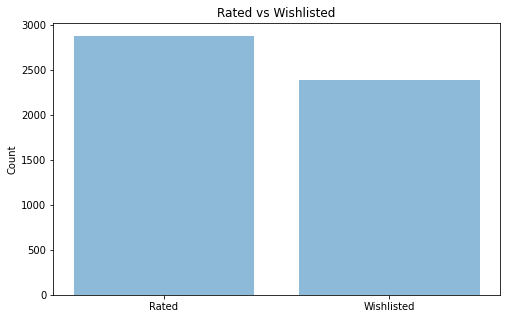

In [ ]:
objects = ('Rated','Wishlisted')
y_pos = np.arange(len(objects))
counter = [len(rated),len(wishlisted)]

plt.figure(figsize=(8,5))
plt.bar(y_pos, counter, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Rated vs Wishlisted')

plt.show()

#### Overall Rating Chart

A plot of ratings distributed for every album listened

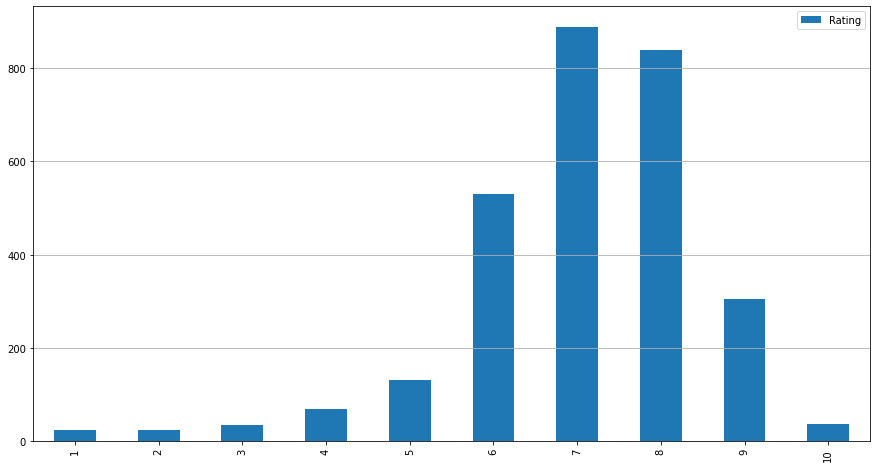

In [ ]:
ax = rated.Rating.value_counts().to_frame().sort_index().plot(kind="bar",figsize=(15,8))
ax.yaxis.grid(True)

We notice the user holds a fairly unbiased rating averaging around 7.5/10, while also having a few really low rated albums. Realising quality over quantity.  


---



#### Rating Trend every Decade 

The following are subplots of rating distributions for each decade. 

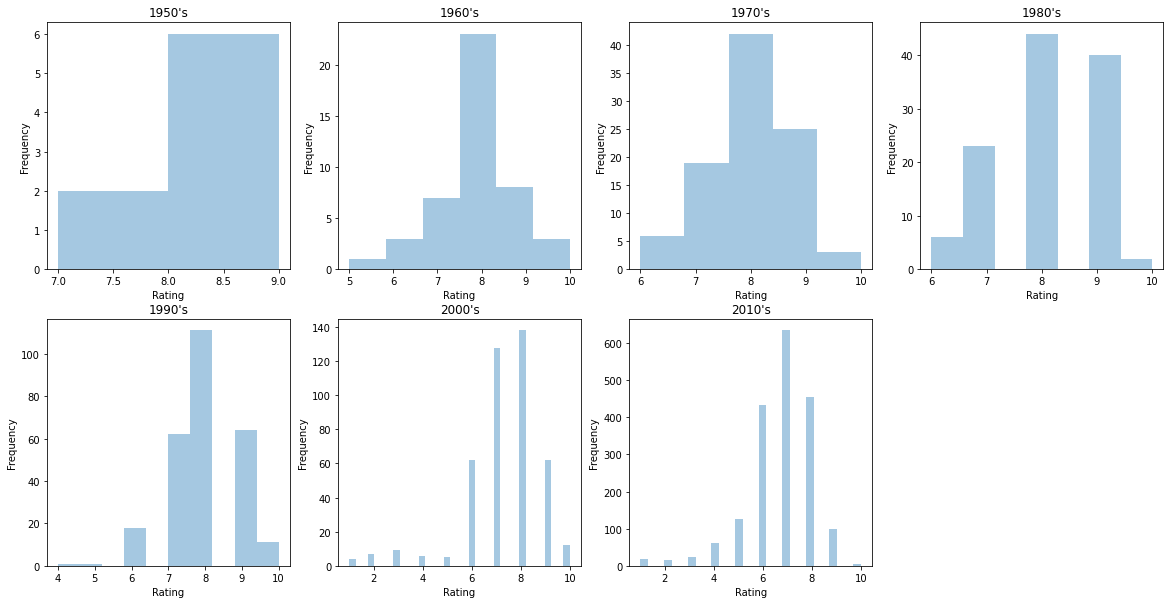

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
for i, ax in zip(range(1950,2011,10), axes.flat):
    sns.distplot(rated[rated.Release_Date.isin(range(i,i+10))].Rating, ax=ax, kde=False).set_title(str(i)+"'s")
fig.delaxes(axes[1][3])
for ax in axes.flat:
    ax.set(xlabel='Rating', ylabel='Frequency')

We notice in the plot how there's a clear scarcity of albums during the 50's slowly picking up in the 60's and doubling in the 70s and 80s, with most of the album rated a 8/10, and infact the 80s picking up a good number of classics close to a 9. 

The 2000s have a good range of albums being rated differently. A few even as close to being 2/10 but however still have the highest number of 9/10 albums.

The 2010s are clearly the most dominant of the bunch, about 700 albums averaging around 7, equally good number of 6s and 8s present this decade. 


---



#### Albums Count based on Release Date 

A view of number of albums rated by the user for each release year

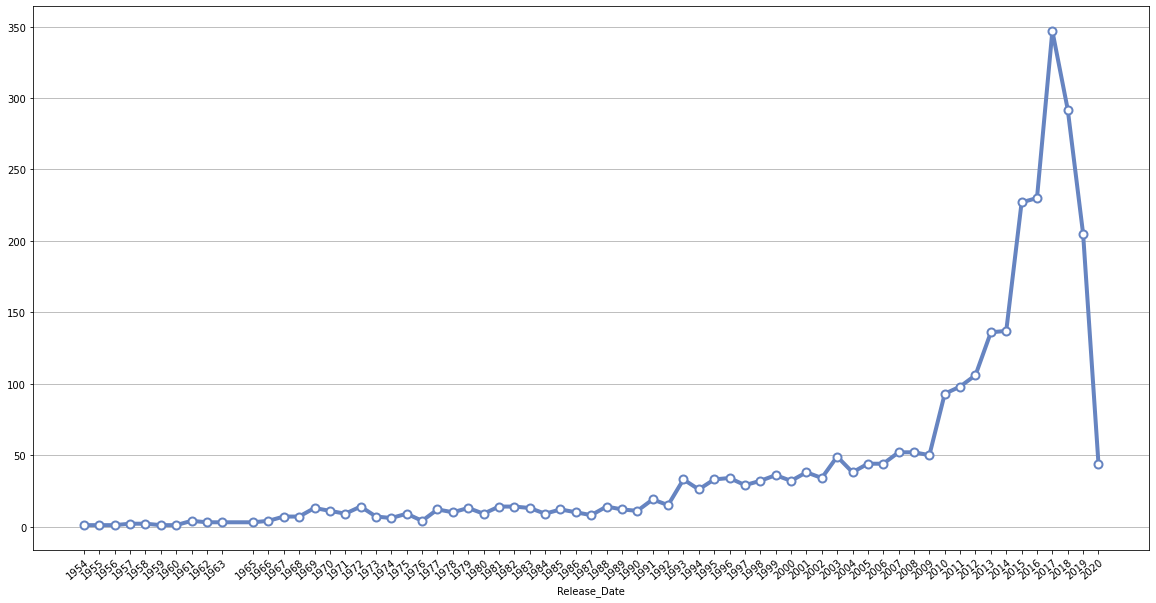

In [ ]:
year_count =  rated.groupby('Release_Date').size()
ax = year_count.plot(kind='line', figsize=[20, 10], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)
ax.yaxis.grid(True)

ax.set_xticks(year_count.index)
ax.set_xticklabels(year_count.index,rotation=40, rotation_mode='anchor', ha='right')
plt.show()

As established before, not a lot of albums were heard in the 50s to 70s, which are apparent in the graph, there's a slgiht positive trend starting from the mid-80s, more albums heard every year progressing. 90s almost twice as much with a steady pace in the 00s and a huge exponential increase after the 2010. Almost 350 album released on 2017 were listened and rated by the user alone, around 300 the next year and a drastic decrease to 2019 and 2020, coinciding with when university started.  

#### Album Rating Based on Release Date
A view of average ratings for all albums listened to each year 

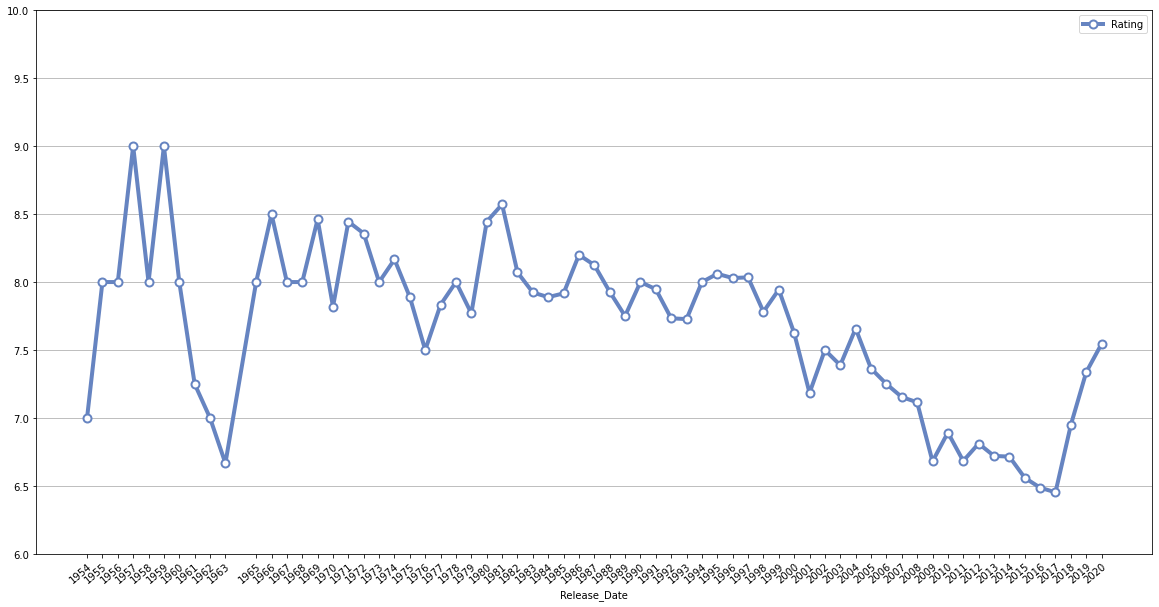

In [ ]:
year_rated = rated.groupby('Release_Date').agg('mean')
ax = year_rated.plot(kind='line', figsize=[20, 10], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2, ylim=(6,10))
ax.yaxis.grid(True)
ax.set_xticks(year_rated.index)
ax.set_xticklabels(year_rated.index,rotation=40, rotation_mode='anchor', ha='right')
plt.show()

The ratings across the years are around the age 6.5 to 9. Notice when compared to the previous graph, the rating average continues to reduce, as the amount of albums heard increases. Commonly because the average of the ratings for each year is taken, a single lesser rated album could bring down the average. The same goes for the first few years, there appears strict curves for the 50s - 60s



---



### LastFM

#### Top Artists
 
 The following graph is pretty self explanatory, we plot the total number of plays for the top 30 artists.

A clear favourite, Animal Collective appears on the top, with track play count around 800 followed by Kanye West around 550, Xiu Xiu almost half of the first. 

Yves Tumor, recent favourite only since last year, has already climbed up the charts.

Text(0, 0.5, 'Number of plays')

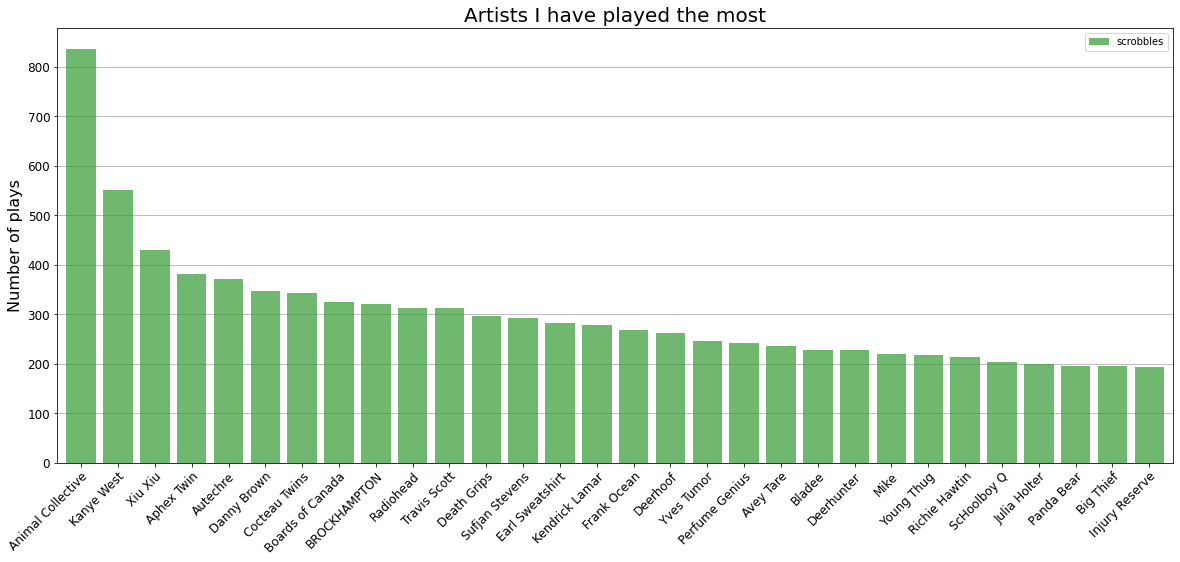

In [ ]:
ax = lastfm_artist[['scrobbles']][:30].plot(kind='bar',figsize=(20,8),width=0.8, alpha=0.7, color='#339933', edgecolor=None, zorder=2)
ax.yaxis.grid(True)
ax.set_xticklabels(lastfm_artist.index[:30], rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)


##### Progression over the Years

Having noticed the top artists, we graph the progression of the top 6 since account creation, we noticed how Animal Collective and Kanye West well already scrobbled since 2015. After 2016, animal collective grew hugely, while Kanye West picked up after 2017, while autechre picked up the following year and matched Aphex Twin on 2019.

In [ ]:
n = 6
plays = lastfm[lastfm['artist'].isin(lastfm_artist.head(n).index)]
plays = plays.groupby(['artist',plays.index.year]).count().groupby(level=[0]).cumsum()['scrobbles']
top_artists = plays.index.levels[0]

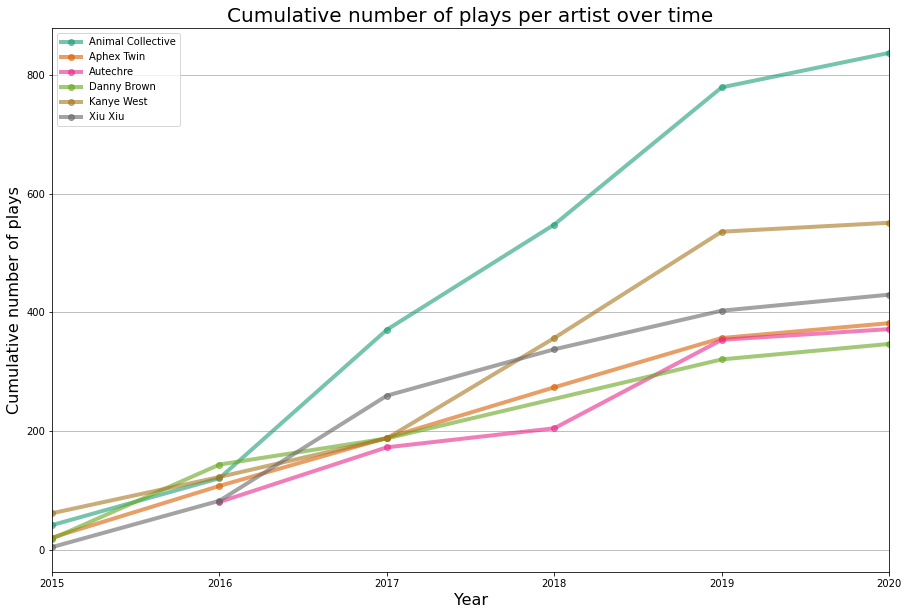

In [ ]:
colors = get_colors('Dark2', n)

fig, ax = plt.subplots(figsize=[15, 10])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper left')


#### Top Albums

The main reason off using albums rather than tracks is because, the user is an album listener. they tend to listen to a full album rather than playlists. 

We make use of the`album_most` variable. The following graph shows the top most played albums since account creation.
 
The notice how, top artists don't necessarily need to be present in the top albums chart. This is because an artist could possibly have a huge discography, and play count shared between albums.

The top most album by Richie hawtin, is at it's place because the album has huge number of tracks but shorter lengths, this contributes to easy scrobbling. The album by injury reserve, has its place in the charts, because one of the tracks in the album, had been playing a lot. The remaining albums however have a respectable place in the chart, due to their replay value.

In [ ]:
def make_label(row, maxlength=25, suffix='...'):
    artist = row['artist']
    track = row['album']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength-len(suffix)], suffix)
    return '{}\n{}'.format(artist, track)

index = albums_most.apply(make_label, axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)

Text(0.5, 1.005, 'Albums I have played the most')

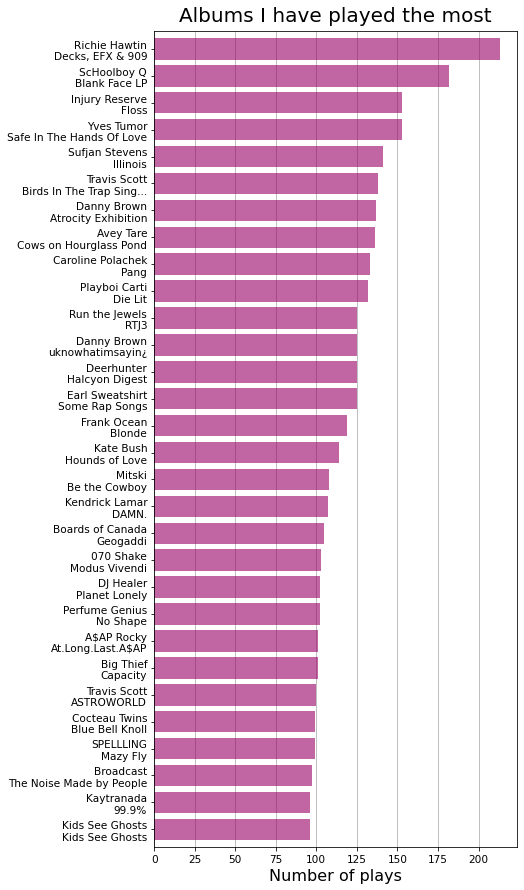

In [ ]:
ax = albums_most.sort_values().plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, color='#990066', 
                                    edgecolor=None, zorder=2)
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Albums I have played the most', fontproperties=title_font, y=1.005)


#### Scrobble Count

##### Day of the Week Scrobble Count

A simple chart showing total number of plays for each day of the week. The weekdays appear to be slightly higher than the weekend because most of the album listening is done while travelling to university or studying.

Text(0, 0.5, 'Number of plays')

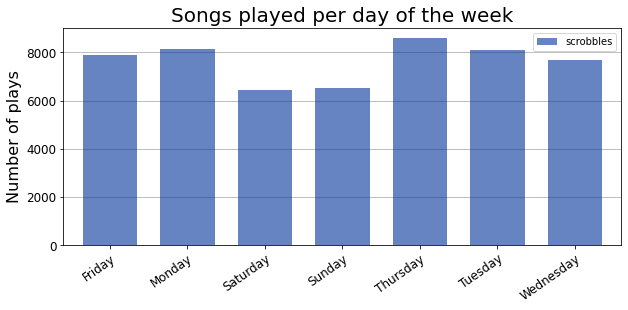

In [ ]:
ax = weekly.plot(kind='bar', figsize=[10, 4], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(weekly.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Songs played per day of the week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)


##### Yearly Scrobble Count
 
The following graph show scrobbles for each year following from 2015 to 2020, there's a steady growth from 2019 reaching a scrobble count of around 15000.

Text(0.5, 1.0, 'Number of tracks played per year')

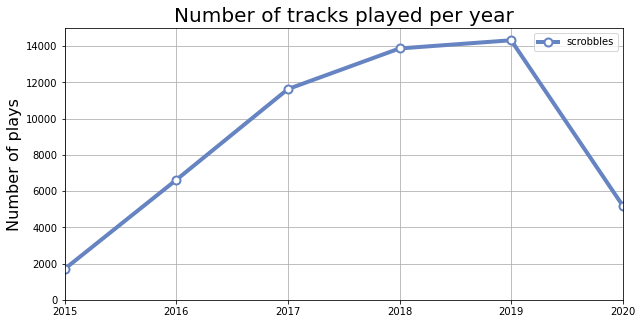

In [ ]:
 
ax = yearly.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)
 
ax.set_xlim((yearly.index[0], yearly.index[-1]))
 
ax.grid(True)
ax.set_ylim(0, 15000)
ax.set_xticks(yearly.index)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of tracks played per year', fontproperties=title_font)

##### Monthly Scrobble Count
 
Following graph extends the previous by showing monthly track play counts. the positive trend of clear count isn't that clear since there's quite a steady number of peaks within 3 months ranges. 
 
There however appears to be a very vague pattern starting from 2018 to start off 2020. A smaller peak followed by a huge appeak is present in each year. we can make a poor  estimation that they could be a huge peak following from June 2020 to the rest of this year.
 
September, 2019 appears to be the most active month.

Text(0.5, 1.0, 'Number of tracks played per month, 2015-2020')

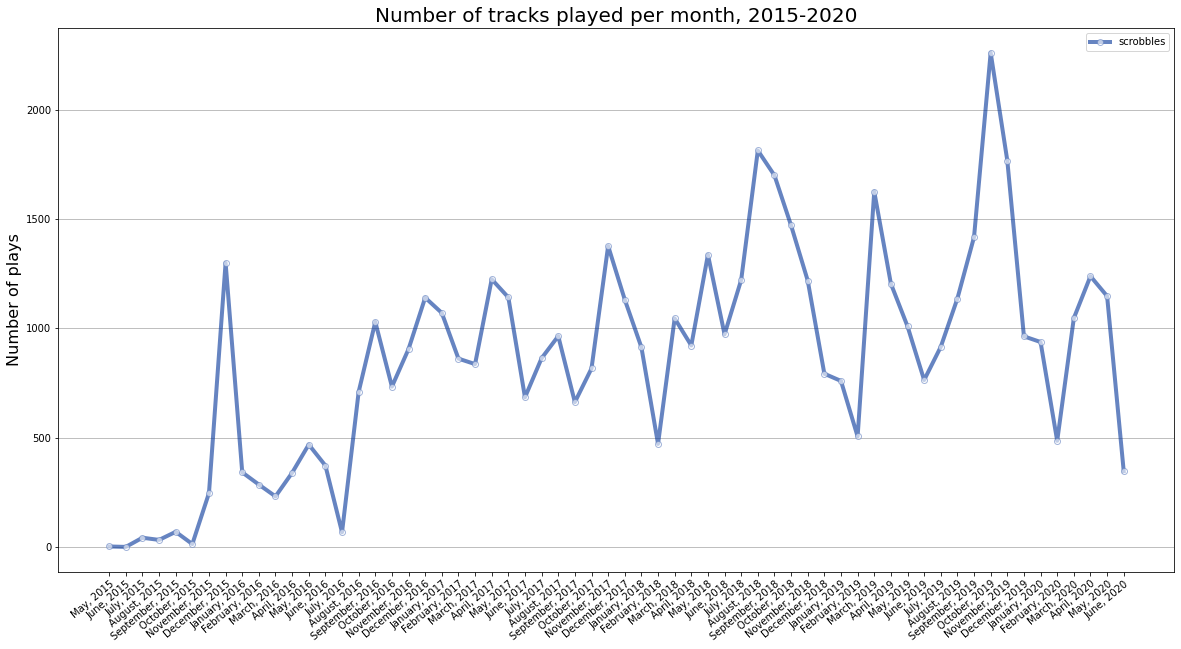

In [ ]:
xlabels = [str(monthly.index[i].month_name()) + ", " + str(monthly.index[i].year) for i in range(len(monthly))]
monthly.index = xlabels

ax = monthly.plot(kind='line', figsize=[20, 10], linewidth=4, alpha=0.6, marker='o', color='#003399', markeredgecolor='#6684c1', markerfacecolor='w')

ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

#ax.set_xlim((0, len(monthly)-1))

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of tracks played per month, {}-{}'.format(2015, 2020), fontproperties=title_font)

##### Yearly vs Favourite Year
 
We tend to listen to a particular artist for many years, we however make a speculation where all play counts of that artist is considered in one year, the yeah you've played the artist the most and compare it with yearly scrobbles logged by lastFM.
 
We make use of the `lastfm_artist` variable which has the *FavYear* column that holds which year each artist has been heard the most. 
 
We try and grouping up these favourite years and collect a sum of all the scrobbles for each year.

When compared with the yearly graph win notice how similar they are, the user unconsciously tends to balance out his artist listens across every year.

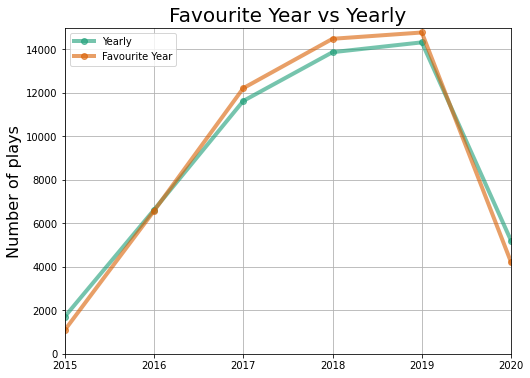

In [ ]:
n = 6
colors = get_colors('Dark2', n)
fig, ax = plt.subplots(figsize=[8, 6])
 
temp = yearly
temp['fav_scrobbles'] = lastfm_artist.groupby(['FavYear']).agg('sum')[['scrobbles']]
 
for col, c in zip(temp.columns,colors):
  ax = temp[col].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
 
 
ax.set_xlim((yearly.index[0], yearly.index[-1]))
ax.grid(True)
ax.set_ylim(0, 15000)
ax.set_xticks(yearly.index)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Favourite Year vs Yearly', fontproperties=title_font)
ax.legend(['Yearly','Favourite Year'], loc='upper left')

##### Monthly vs Favourite Month
 
This comparison is very similar to the previous graph.
 
We use the `bymonth` variable, holding total counts of scrobbles for each month every year. The *FavMonth* is very similar where it saves the most played month of the artist regardless the year.
 
The comparison is in a similar as the previous graph, however there is still quite a good resemblance with the monthly count. April,October and November were 3 month where the total scrobbles for each of these months regardless of the year was almost same as the total scrobbles of the artists that have been played the most these months.

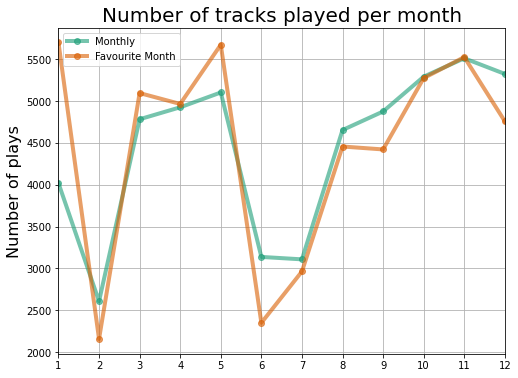

In [ ]:
colors = get_colors('Dark2', n)
fig, ax = plt.subplots(figsize=[8, 6])
 
temp = bymonth
temp['fav_scrobbles'] = lastfm_artist.groupby(['FavMonth']).agg('sum')[['scrobbles']]
 
for col, c in zip(temp.columns,colors):
  ax = temp[col].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
 
ax.set_xlim((bymonth.index[0], bymonth.index[-1]))
ax.grid(True)
ax.set_xticks(bymonth.index)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of tracks played per month', fontproperties=title_font)
ax.legend(['Monthly','Favourite Month'], loc='upper left')

#### 🕒 Listening Clock 🕒
  
Listening clock helps realise music patterns for a day, we devise a yearly and weekly summary.

##### Totally for a day
 
The following graph is a simple summary of a listening clock, which shows the total number of scrobbles (track plays) for each hour of the day. 
 
the graph shows that the user appears to be more active around 2 to 3 a.m. in the morning and 10 to 11 a.m. in the morning. 
 
The graph however is a little vague, since it summarises 5 years in a day. The following two listening clock graphs explain user behaviour better

Text(0.5, 1.0, 'Number of songs played per hour of the day')

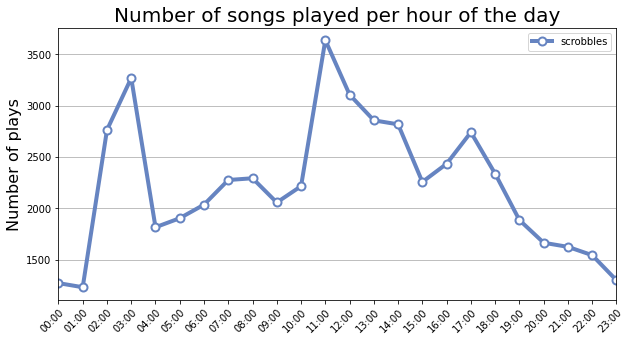

In [ ]:
ax = hourly.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hourly.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hourly.index[0], hourly.index[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)


##### Yearly for a day 
 
The following graph quite importantly shows the users behaviour on a daily basis for each year. Total count of scrobbles are considered hourly for each year. 
 
At first it might look quite messy, but except for 3 a.m. in the morning for the years 2015 to 2018, the second half of the day is usually slightly more active than the first half. Habit of staying late at night around 1 a.m. to 3 a.m. is clearly visible, 2017 being the worse due to a long semester break. 
  However the years 2019 and 2020 appear to have the first half more active than the second half of the day, a possible reasoning could be a change in time zones from India to Australia. The similar habit was shown in 2019 at 11 p.m., listening to music before sleeping.

In [ ]:
yearly_hour_counts = lastfm.groupby([lastfm.index.year,lastfm.index.hour]).agg('count')['scrobbles']
hour_numbers = yearly_hour_counts.index.levels[1]
day_numbers = yearly_hour_counts.index.levels[0]

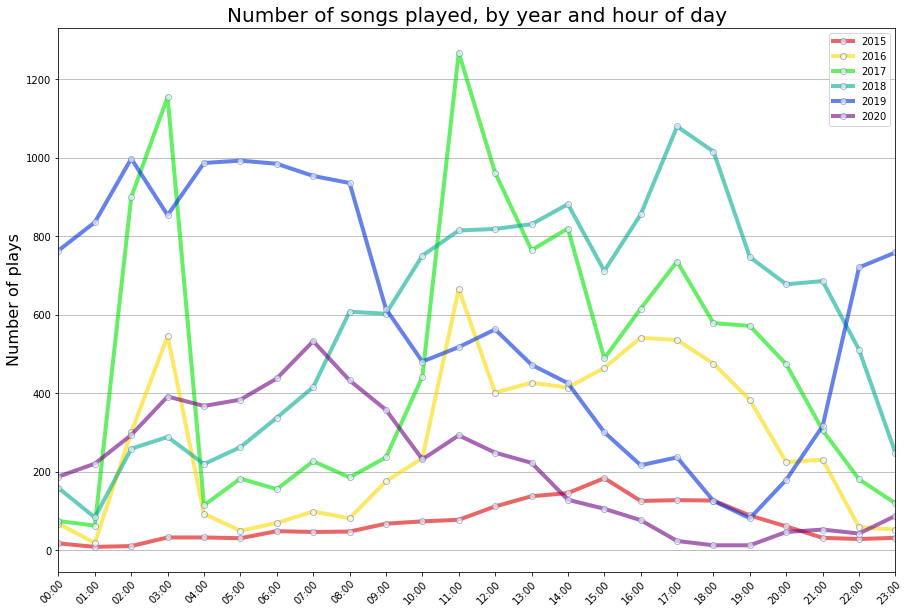

In [ ]:
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

fig, ax = plt.subplots(figsize=[15, 10])
lines = []
for day, c in zip(day_numbers, colors):
    ax = yearly_hour_counts[day].plot(kind='line', linewidth=4, alpha=0.6, c=c, marker='o', markeredgecolor='#6684c1', markerfacecolor='w')
    #lines.append(day_names[day])
    
xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_numbers[0], hour_numbers[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played, by year and hour of day', fontproperties=title_font)
ax.legend(day_numbers, loc='upper right')


##### Weekly for a day 
 
Following graph shows the total play count for each day of the week.
 
We noticed how weekdays have a same pattern around 1 a.m. to 4 a.m. and around 10 a.m. to 1 p.m., the rest of the day have similar patterns. 
 
Habit of waking up early on a Sunday is shown since the scrobble rates around midnight to 5 am are really low. Another habit of listening to music before sleeping on a Sunday night are clearly apparent.

In [ ]:
weekday_hour_counts = lastfm.groupby([lastfm.index.strftime('%A'),lastfm.index.hour]).agg('count')['scrobbles']
hour_numbers = weekday_hour_counts.index.levels[1]
days = weekday_hour_counts.index.levels[0]

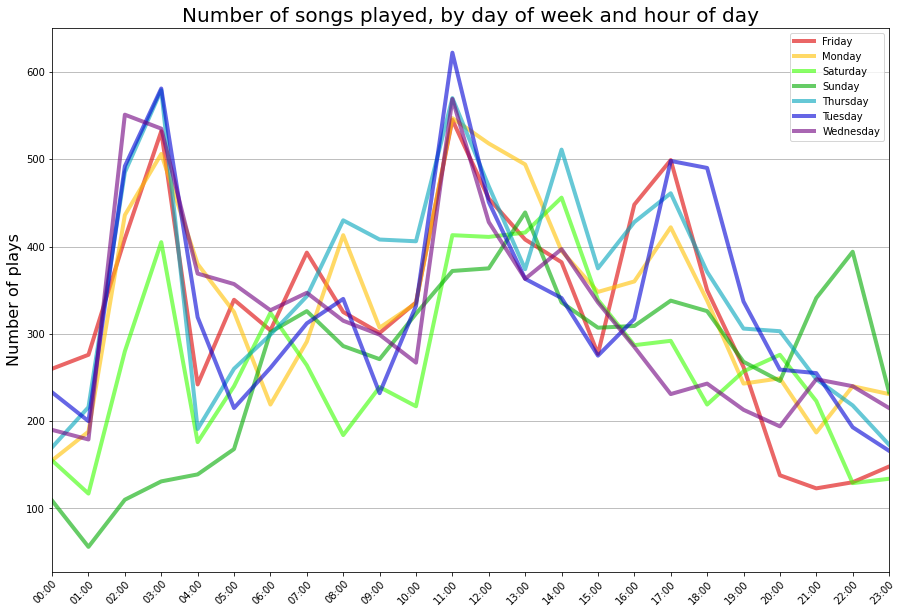

In [ ]:
colors = get_colors('nipy_spectral_r', n=len(days), start=0.1, stop=0.95)

fig, ax = plt.subplots(figsize=[15, 10])
lines = []
for day, c in zip(days, colors):
    ax = weekday_hour_counts.loc[day].plot(kind='line', linewidth=4, alpha=0.6, c=c)
    #lines.append(day_names[day])
    
xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_numbers[0], hour_numbers[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played, by day of week and hour of day', fontproperties=title_font)
ax.legend(days, loc='upper right')


#### Text Analysis
 
We look at a quick simple analysis using the artist names present in `rym`. This is done so as to remove repetition.

##### Artist count based alphabetically
 
We look at a simple analysis where we look at the total number of counts of artist names beginning with their first letter. 
 
We make sure to remove words like the and herb for the artist names. We see a clear phenomenon where, artist names starting with 's' are the most frequent. This is followed by the letter m and c. 
 
The data however appear to have a lot of non-English artist names that are in this analysis.

In [ ]:
artists_clean = rym['Artist'].str.replace('The ','').str.replace('A ','').str.replace('a ','').str.replace('the ','')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

Text(0, 0.5, 'Number of unique artists')

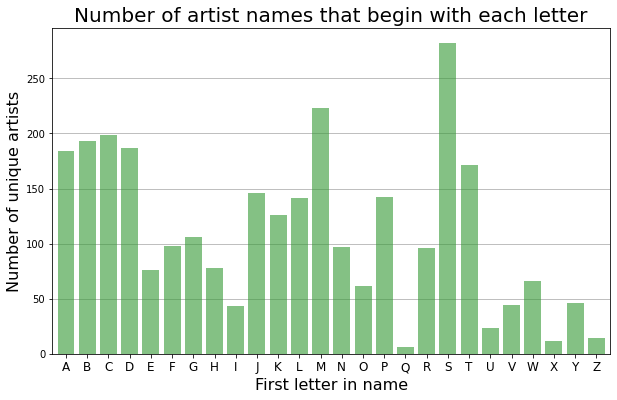

In [ ]:
ax = first_letters.plot(kind='bar', figsize=[10, 6], width=0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)
ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
 
ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)
ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

##### Common Words in Artist Names
 
While removing stop words, an unnecessary symbols we look at a few common words that are present in artist names. As a person who listens to a fair number of electronic music, DJ appears to be the most frequent word used, followed by John, black and big.

In [ ]:
word_list = []
stop_list=['&','/','and','of','with','+','for','in','on']
for artist in artists_clean.unique():
    for word in artist.split():
        word_list.append(word.lower())

word_list = [word for word in word_list if word not in stop_list]
pd.Series(word_list).value_counts().head(15)

dj           37
john         26
black        22
young        14
big          14
de           13
band         13
orchestra    12
lil          10
chris        10
king         10
david         9
michael       9
death         9
no            9
dtype: int64

##### Longest Artist Name

Appears to be from an orchestra classical album.

In [ ]:
print('"{}"'.format(max(artists_clean, key=len)))

"Aloys Kontarsky / Harald Bojé / Johannes Fritsch / Alfred Alings / Rolf Gehlhaar / J.-F. Jenny-Clark / Jean-Pierre Drouet / Carlos Roqué Alsin/ Michel Portal / Péter Eötvös / Herbert Henck / Michael Vetter / Karlheinz Stockhausen"


##### Histogram of Artist Name Length

Having noticed an unusually long artist name we have a quick look on the frequency of artists name lengths. 10 to 13 characters for an artist name seems to be the most frequent, around 200 to 250 of them have them.

In [ ]:
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

Text(0, 0.5, 'Number of artists')

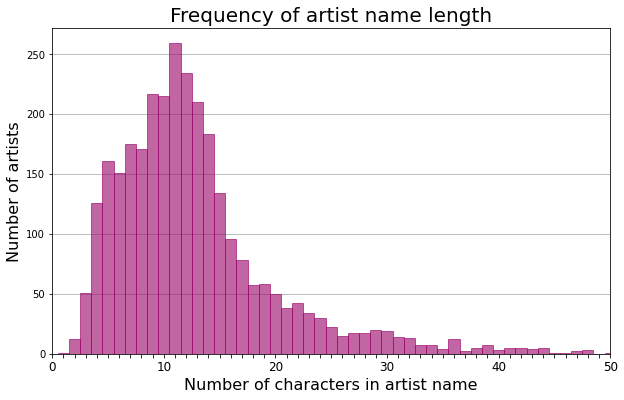

In [ ]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)




---



<a name='model'></a>
## 🔎 Data Modelling 🔎

 ### Model Comparison (Supervised)

We finally use our `combined` variable that has both `rym_artist` and `lastfm_artist` with common indices. We try creating a few models and notice if there's any particular behavior noticable or predictable.

we understand our variables by plotting a pairplot

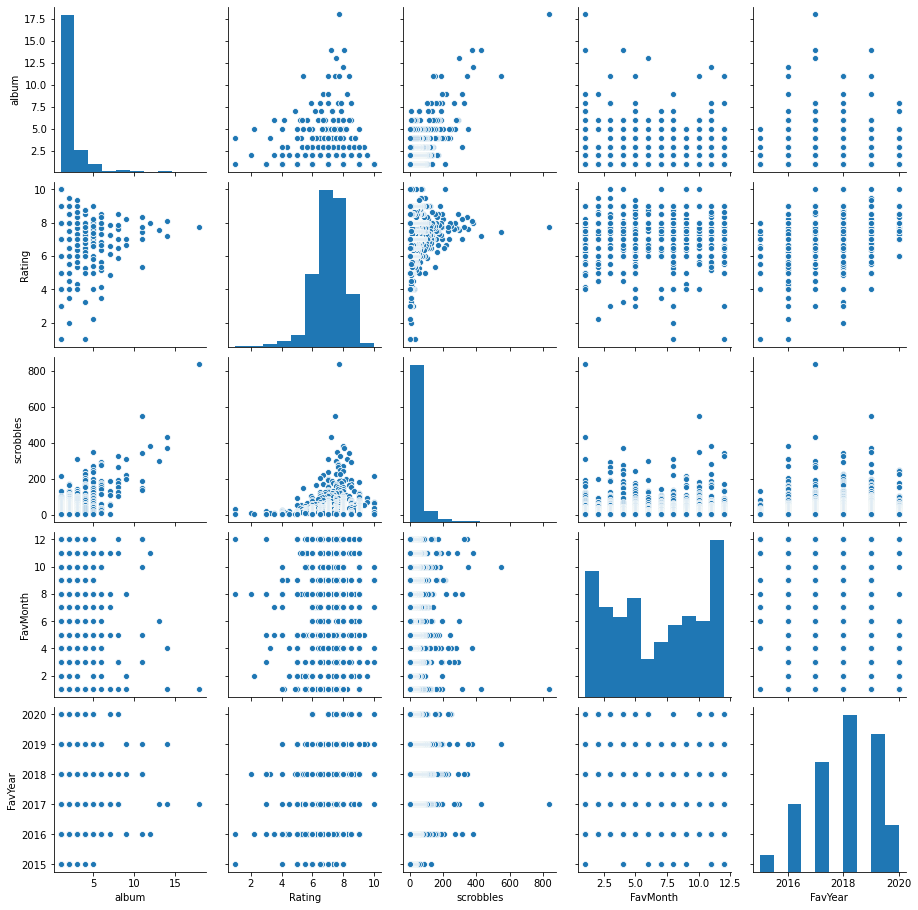

In [ ]:
sns.pairplot(combined)

Here, one of the three combinations can be used to test possible predictions. 

Simply understood, one column needs to be predicted, while the others are used as predictors. 

In [ ]:
"""
X = combined[combined['scrobbles']>40][['scrobbles','album','FavMonth','FavYear']]
y = combined[combined['scrobbles']>40].Rating.astype(int)
"""

"\nX = combined[combined['scrobbles']>40][['scrobbles','album','FavMonth','FavYear']]\ny = combined[combined['scrobbles']>40].Rating.astype(int)\n"

In [ ]:
"""
X = combined[combined['scrobbles']>40][['scrobbles','album','FavMonth','Rating']]
y = np.array(combined[combined['scrobbles']>40].FavYear).astype(int)
"""

"\nX = combined[combined['scrobbles']>40][['scrobbles','album','FavMonth','Rating']]\ny = np.array(combined[combined['scrobbles']>40].FavYear).astype(int)\n"

In [ ]:
X = combined[combined['scrobbles']>40][['scrobbles','album','FavYear']]
y = np.array(combined[combined['scrobbles']>40].Rating).astype(int)

#### Simple Model Comparison 

We use a wide variety of models and run them all stright forward recursively, their accuracy scores and classification reports are printed out. 

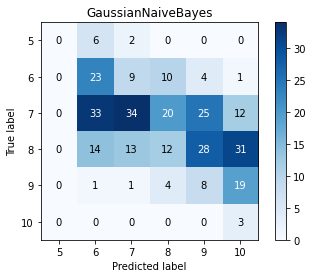

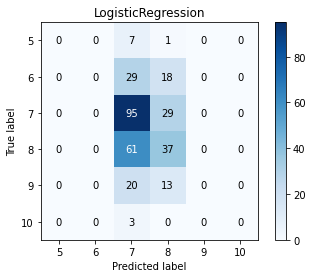

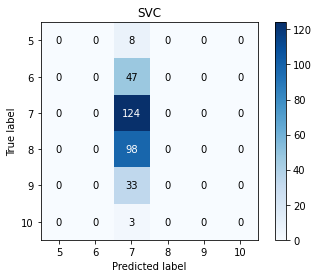

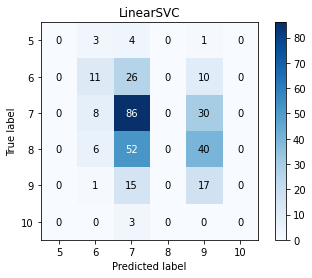

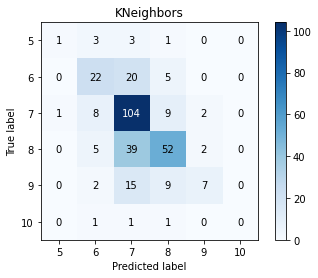

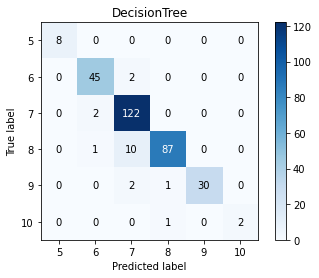

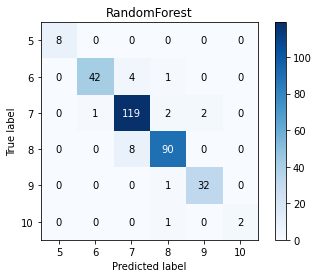

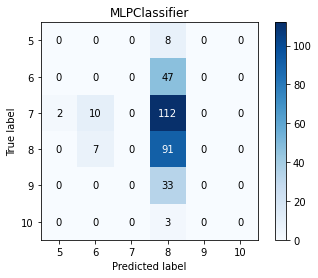

In [ ]:
models = []
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=0, max_features=None)))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


result = []
name = []
for n, model in models:
  model.fit(X,y)
  pred = model.predict(X).astype(int)
  skplt.metrics.plot_confusion_matrix(y, pred, title=n)
  name.append(n)
  result.append(accuracy_score(y,pred))

##### Algorithms Compared

The following is a simple visualisation on which algorithm had a better accuracy rate, which is clearly identified by DecisionTree and RandomForest. 


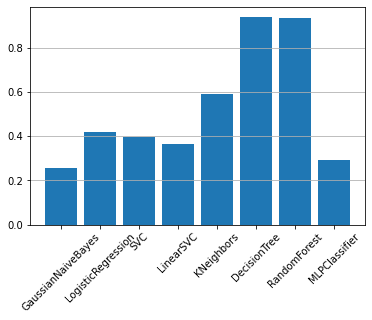

In [ ]:
plt.bar(name,result)
plt.xticks(rotation=45)
plt.grid(axis="y")

#### Models with KFold Cross-Validation Comparison

we follow the same experiment, this time using a KFold cross-validator, we choose a k value of 10, a simple well known k-value. 

The $R^2$ values and confusion matrices are printed for each respective model, while the cross validation scores are saved later for comparison.


GaussianNaiveBayes: 0.231452 +- (0.145572)
R^2: -1.219667340009455

LogisticRegression: 0.379839 +- (0.096332)
R^2: -0.3889736536725834

SVC: 0.394960 +- (0.108132)
R^2: -0.13001246400481348

LinearSVC: 0.322379 +- (0.149712)
R^2: -1.1759466196759356

KNeighbors: 0.379032 +- (0.116660)
R^2: -0.16028065500494248

DecisionTree: 0.403125 +- (0.098111)
R^2: -0.4024261830059739

RandomForest: 0.386694 +- (0.105712)
R^2: -0.34861606567241155

MLPClassifier: 0.188911 +- (0.141930)
R^2: -2.2218807753470577


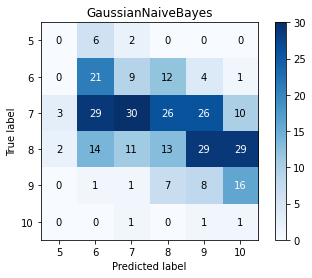

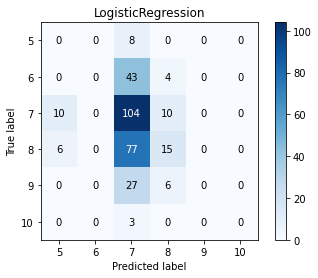

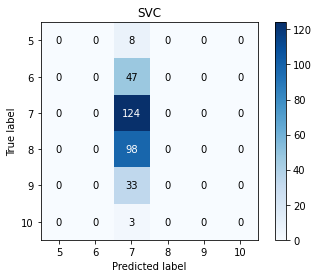

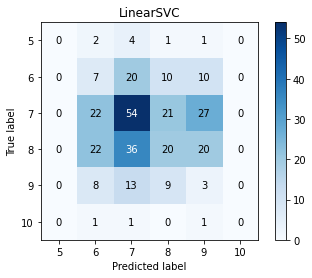

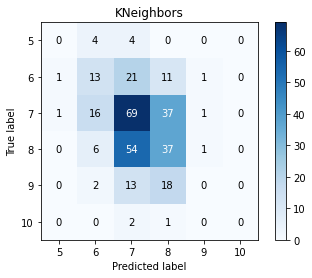

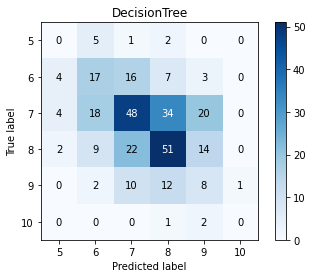

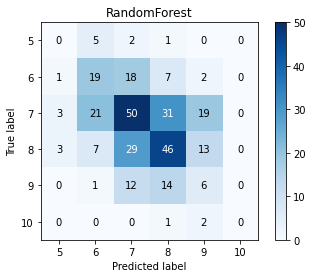

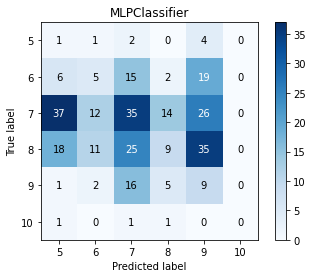

In [ ]:
models = []
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=0, max_features=None)))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


results = []
names = []
for name, model in models:
        kfold = KFold(10, random_state=7)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "\n%s: %f +- (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        y_pred = cross_val_predict(model, X, y, cv=kfold).astype(int)
        print("R^2:", r2_score(y, y_pred))
        skplt.metrics.plot_confusion_matrix(y, y_pred, title=name)

##### Algorithms Compared

The cross validation score's have been using to compared algorithms using a boxplot. The relative accuracy rates are really low but still around 40-50. 

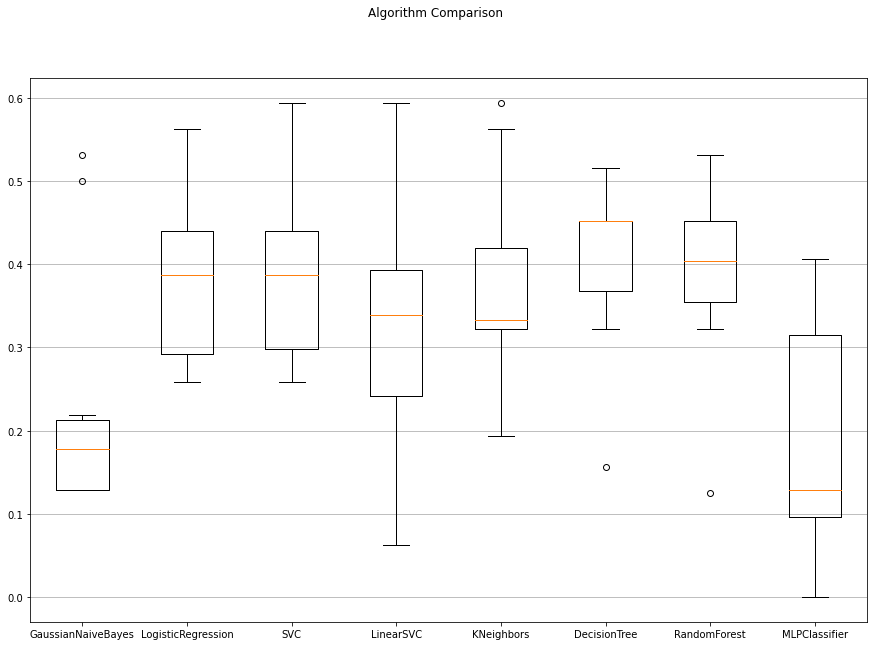

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.yaxis.grid(True)
plt.show()



---



### 🎨 K-Means Clustering for Recent Favourites (Unsupervised) 🎨

This analysis is inspired by the visualisation created for top artist scrobble progression over the years.

Previous graphs would show you how 2015 (the year of account creation) and 2020 (only mid-year now) do not have enough scrobbles to certify for a yearly summary and are therefore ignore. We split our years into two halfs, first being 2016-2017 and the second being 2018-2019.

We look at the top 250 artists of the user and calculate the scrobble count for each halves of the span. 

In [ ]:
favourites = pd.DataFrame(index=lastfm_artist[:250].index)
for name, i in zip(['first_half','second_half'],[[2016,2017],[2018,2019]]):
  favourites[name]= lastfm[lastfm.index.year.isin(i)].groupby(['artist']).agg('count')[['scrobbles']]

favourites.head()

,first_half,second_half
artist,,
Animal Collective,329.0,408.0
Kanye West,126.0,348.0
Xiu Xiu,255.0,143.0
Aphex Twin,168.0,168.0
Autechre,173.0,181.0


The following graph is a simple representation of the data, we notice however that it's right-skewed and therefore doesn't give optimal results for clustering.

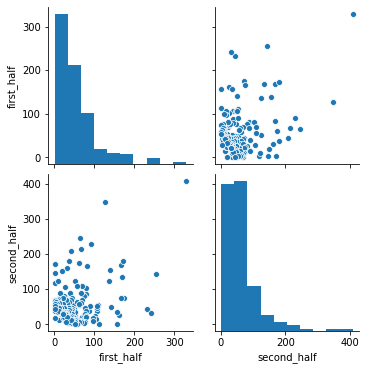

In [ ]:
sns.pairplot(favourites)

A simple log transformation should do the trick, the data is much more scattered and easier to work with

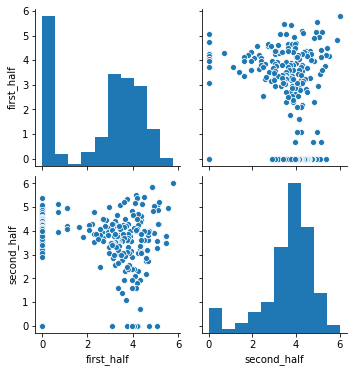

In [ ]:
favourites = np.log(favourites).fillna(0)
sns.pairplot(favourites)

#### Choosing Optimal K-value

We now perfom the k-means clustering algorithm with k-values from 2 to 5, anything further would make the classification further harder. 



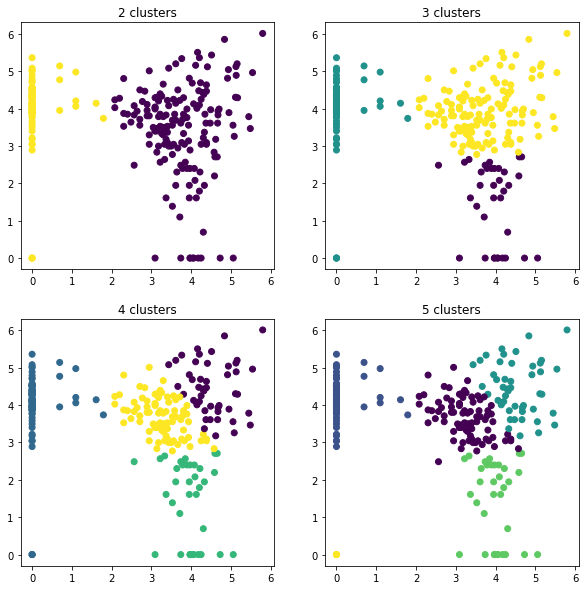

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(2,6):
  km = KMeans(n_clusters=i)
  km.fit(favourites)
  favourites['label'] = km.predict(favourites)
  ax = fig.add_subplot(2,2,i-1)
  ax.scatter(favourites['first_half'], favourites['second_half'],c=favourites['label'])
  ax.set_title(str(i)+" clusters")

plt.show()

We can choose a value of k = 3, 4 or 5 when we look at the subplots, despite 3 being easier, there is definitely a chance to explain 4 or 5 clusters as well (and also helps categorise better).

This confusion can be resolved by using Hierarchical clustering and examining the dendograph to understand what natural clusters are present in the data.  

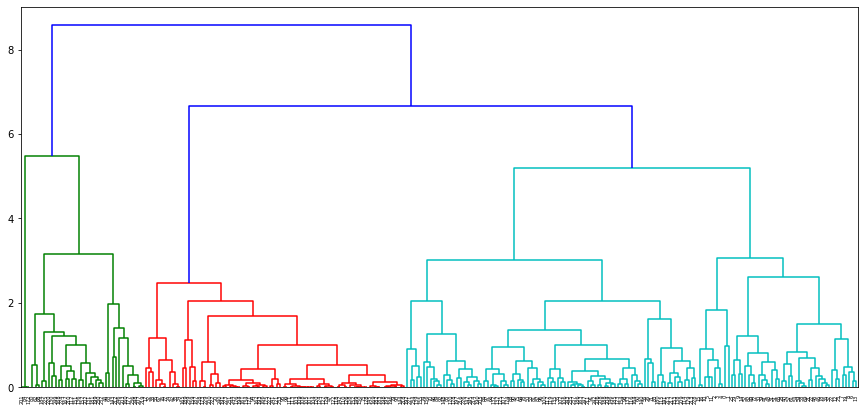

In [ ]:
dist = pdist(favourites, 'euclidean')
linkage_matrix = linkage(dist,method = 'complete')
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

#### Clusters Explained

With k = 5, we explore the mean values for each label. But however, labels change each time the program is run and we therefore work with difference in the mean of now looking at `mean['dif']`

**highest number** - Great number of scrobbles in first half followed by very few scrobbles in second half

**lowest number** - Very few scrobbles in first half, great number of scrobbles in second half 

**second lowest** - A good number of scrobbles in first half followed by a increase in scrobbles in second half
 
**second highest** - Greatly steady number of scrobbles throughout all years.

**zero** - the rare possibility of having exactly one scrobble in these years, seen as an outlier and ignored.




In [ ]:
labels = cut_tree(linkage_matrix, n_clusters=5)
favourites['label'] = labels

mean = favourites.groupby(['label']).agg('mean')
mean['dif'] = mean.first_half-mean.second_half
mean

,first_half,second_half,dif
label,,,
0,4.526906,4.447383,0.079523
1,0.112519,4.188750,-4.076231
2,3.251418,3.654137,-0.402718
3,3.994553,1.464095,2.530457
4,0.000000,0.000000,0.000000


#### 🕵️‍♀️ Cluster Speculations and Comparisons 🕵️‍♀️

From here on we look at each cluster and speculate a certain behaviour, this is then matched with the `lastfm_artist['FavYear']` variable to see if their true.

(*FavYear* is a column that shows the most scrobbled year for a particular artist)



**Assumption (first cluster):**

The following artists haven't been heard as much since 2018, possibility of loosing steam or just change in music taste of the user:

In [ ]:
high = favourites[favourites.label==mean.loc[(mean.dif==mean.dif.max()),:].index[0]].index
high

Index(['Run the Jewels', 'Clark', 'Blur', 'Broken Social Scene', 'Mac DeMarco',
       'Childish Gambino', 'The Weeknd', 'Ariel Pink', 'Thundercat', 'Ab-Soul',
       'Madvillain', 'Asobi Seksu', 'Skepta', 'Beck', 'Nxworries', 'Kemba',
       'Shigeto', 'Moses Sumney', 'AFX', 'Feist', 'King Krule',
       'L I T H I C S', 'Joey Bada$$', 'Clams Casino', 'Fuck Buttons',
       'Kurt Vile', 'Yo La Tengo', 'The Beatles', 'Esperanza Spalding',
       'Don Caballero', 'Kid Cudi', 'Sun City Girls', 'Kevin Penkin',
       'Gorillaz'],
      dtype='object', name='artist')

Cross checking with passing the mentioned artists to `lastfm_artist` and giving a top count of *FavYear*, proves our assumptions. Most scrobbles are from the first half.

In [ ]:
lastfm_artist[lastfm_artist.index.isin(high)]['FavYear'].value_counts().to_frame()[:2]

,FavYear
2017,25
2016,5


**Assumption (second cluster):**

The following artists either had new albums released since 2018 or have been newly discovered and have great replay value:

In [ ]:
low = favourites[favourites.label==mean.loc[(mean.dif==mean.dif.min()),:].index[0]].index
low

Index(['Yves Tumor', 'Bladee', 'Richie Hawtin', 'Swans', 'James Ferraro',
       'Kate Bush', 'Dean Blunt', 'Playboi Carti', 'Fiona Apple',
       'Caroline Polachek', 'DJ Healer', 'RP Boo', 'JPEGMAFIA', 'Pan Sonic',
       'Ecco2k', 'SPELLLING', 'Billy Woods', 'Coil', 'Kids See Ghosts',
       'Rosalía', 'Special Request', 'Alva Noto', 'Siouxsie and the Banshees',
       'Natural Snow Buildings', 'Bogdan Raczynski', 'Jessica Pratt',
       'The Velvet Underground', 'Suzi Analogue', 'DJ Sabrina The Teenage DJ',
       'Adrianne Lenker', 'Grimes', 'Christoph De Babalon', 'Metro Boomin',
       'Lee Gamble', 'Caleb Giles', 'Klein', 'Skee Mask', 'Bjarki',
       'Loren Mazzacane Connors', 'Paula Temple', 'Aleksi Perälä', 'The Fall',
       'Supercar', 'Thouxanbanfauni', '(Sandy) Alex G', 'フィッシュマンズ',
       'Tujiko Noriko', 'Daughters', 'serpentwithfeet', 'Portishead',
       'Triad God', 'Galcher Lustwerk', 'Florence + the Machine',
       'Hallelujah Chicken Run Band', 'Holly Herndon', '

*FavYear* count proves the assumption, where mentioned artists have most of their scrobbles in second half.

In [ ]:
lastfm_artist[lastfm_artist.index.isin(low)]['FavYear'].value_counts().to_frame()[:2]

,FavYear
2019,46
2018,22


**Assumption (third cluster):**

The following artists are steady favourites, a possibility of exploring the artists discography in the second half and therefore increasing playcount:

In [ ]:
low2 = favourites[favourites.label==mean.loc[(mean.dif==sorted(mean.dif)[1]),:].index[0]].index
low2

Index(['Julia Holter', 'Tim Hecker', 'Four Tet', 'Grouper',
       'Oneohtrix Point Never', 'Mitski', 'The Flaming Lips', 'Laura Marling',
       'Jefre Cantu-Ledesma', 'Bon Iver', 'Oxbow', 'Kaytranada',
       'Denzel Curry', 'Beach House', 'Burial', 'Varg', 'Future',
       'Sonic Youth', 'Talking Heads', 'Brian Eno', 'Spoon', 'Kelela',
       'Spiritualized', 'ヤプーズ', 'Bat for Lashes', 'Carly Rae Jepsen',
       'James Blake', 'Aldous Harding', 'Tyler, the Creator', 'Lupe Fiasco',
       'FKA twigs', 'Freddie Gibbs', 'Kelly Lee Owens', 'Protomartyr',
       'Jon Hopkins', 'Vampire Weekend', 'OOIOO', 'The Cure',
       'Bowery Electric', 'Julie Byrne', 'Noname', 'Fleet Foxes',
       'Young Fathers', 'Charli XCX', 'Serani Poji', 'Cranes', 'Milo', 'Jlin',
       'Jesca Hoop', 'Swervedriver', 'Japanese Breakfast', 'Nicolas Jaar',
       'Forest Swords', 'Zola Jesus', '2 Chainz', 'The Future Sound of London',
       'Sharon Van Etten', 'Alvvays', 'The Beach Boys', 'Nico', 'Deakin',
     

The first half has lesser count while second half picks up therefore proving our assumption.

In [ ]:
lastfm_artist[lastfm_artist.index.isin(low2)]['FavYear'].value_counts().to_frame()[:4]

,FavYear
2018,31
2017,23
2019,19
2016,8


**Assumption (fourth cluster):**

The following artists are pretty much all time favourites, heard by the user quite frequently, discovered them early in the game and have stuck to them:

In [ ]:
high2 = favourites[favourites.label==mean.loc[(mean.dif==sorted(mean.dif)[-2]),:].index[0]].index
high2

Index(['Animal Collective', 'Kanye West', 'Xiu Xiu', 'Aphex Twin', 'Autechre',
       'Danny Brown', 'Cocteau Twins', 'Boards of Canada', 'BROCKHAMPTON',
       'Radiohead', 'Travis Scott', 'Death Grips', 'Sufjan Stevens',
       'Earl Sweatshirt', 'Kendrick Lamar', 'Frank Ocean', 'Deerhoof',
       'Perfume Genius', 'Avey Tare', 'Deerhunter', 'Mike', 'Young Thug',
       'ScHoolboy Q', 'Panda Bear', 'Big Thief', 'Injury Reserve', 'Slowdive',
       'Arca', 'Flying Lotus', 'Broadcast', 'Actress', 'My Bloody Valentine',
       'A$AP Rocky', 'Angel Olsen', 'Jenny Hval', 'Laurel Halo', 'Drake',
       'M83', 'Andy Stott', 'Björk', 'Nick Drake', 'Chelsea Wolfe', 'Solange',
       'Pusha T', 'Vince Staples', 'Ride', 'Juana Molina', 'Isaiah Rashad'],
      dtype='object', name='artist')

We notice how the counts are very similar throught the mentoned years (2016-2019), our assumption is proved.

In [ ]:
lastfm_artist[lastfm_artist.index.isin(high2)]['FavYear'].value_counts().to_frame()[:4]

,FavYear
2018,12
2017,12
2016,12
2019,11




---



<a name='conclude'></a>
## 🔚 Conclusion 🔚

We proceed to have a good number of results from the the Last.fm and RYM data used. Cleaning the respective data however was quite sensetive since metadata for music isn't always standardly a language which makes it harder to clean. Even instances of merging datasets tends to create data loss in terms of knowledge extraction from columns, they're usually dumbed down to statistical aggregations. We also have huge chances where the user has heard tracks that aren't necessarly rated by the user, furthermore, albums that are rated but haven't been scrobbled to lastfm due to technical issues, et cetra.

Our combined dataset also suffers with the mentioned issue, work is need to carefull edit each artist name, simple stopword removal and case normalizations don't work. The foreign language present in the data is left the way it is since we do not access them explicitely. There are still various ways the data could have been manipulated for analysis which hasn't been done due to time constraints. 

Our visualisations give good insight of the user, listening clocks for example show how the users behaviors are clearly implied on his data. Such insights however aren't related to the music in specific but the timeline of the user's activity. The music-specific analysis of the user can be seen in the model comparison, the simple model resembles a first glance of the users data, showing how scrobble count and the number of albums heard by the user could possibly contribute to the rating of an album (RandomForest and DecisionTree gave out great results), however when cross-validating, the scores border around 40-50%, clearly showing how the user is very unbiased, subjective and erratic when it comes to music. This answers our problem statements. 

The final clustering of artists helps the user realise what truly are his favourite artists, how a few years can completely change who or what he deems as his 'favourite'. 









## Future Works

As mentioned, beter manual cleaning would be needed for better result, however the quality of data isn't rich or quantitative enough for intensive insights. The LastFM API also has options for Artist tags (genre labels) and many such attributes that aren't done in this study. The RYM database infact has one of the best genre tags made. These could be used for intensive research.

Data from the music sources (Spotify for example), have excellent data insights, once specifeied for each track, their duration and even attributes of music like loudness, excitment, etc. This project has the ability to be reproducable extensively.



---



In [ ]:
!jupyter nbconvert --to html music_activity.ipynb

[NbConvertApp] Converting notebook music_activity.ipynb to html
[NbConvertApp] Writing 2030527 bytes to music_activity.html
